In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

In [16]:
# Membaca dataset
diabetes_dataset = pd.read_csv('diabetes_dataset.csv')

In [17]:
# Memisahkan data dan label
X = diabetes_dataset.drop(columns='Outcome', axis=1)
y = diabetes_dataset['Outcome']

In [18]:
# Standarisasi data
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [19]:
# Membagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=2)

In [20]:
# Menyusun model Neural Network
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # Input layer with 64 units
model.add(Dropout(0.5))  # Dropout layer for regularization
model.add(Dense(32, activation='relu'))  # Hidden layer with 32 units
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))  # Hidden layer with 16 units
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Output layer (binary classification)

# Menyusun model dengan optimizer Adam dan binary crossentropy loss function
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [22]:
# Learning rate scheduler function
def scheduler(epoch, lr):
    if epoch > 10:
        lr = 0.0001  # Reduce learning rate after 10 epochs
    return lr

lr_scheduler = LearningRateScheduler(scheduler)

In [30]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1, validation_split=0.2) # Added validation_split

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8177 - loss: 0.4069 - val_accuracy: 0.8618 - val_loss: 0.3234
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8184 - loss: 0.4253 - val_accuracy: 0.8293 - val_loss: 0.3327
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8383 - loss: 0.3711 - val_accuracy: 0.8293 - val_loss: 0.3325
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8462 - loss: 0.3703 - val_accuracy: 0.8293 - val_loss: 0.3393
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8306 - loss: 0.3930 - val_accuracy: 0.8211 - val_loss: 0.3380
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8281 - loss: 0.3908 - val_accuracy: 0.8130 - val_loss: 0.3455
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8369 - loss: 0.3491 - val_accuracy: 0.8130 - val_loss: 0.3427
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8216 - loss: 0.3781 - val_accuracy: 0.8374 - v

In [31]:
# Evaluasi model pada data training dan testing
train_loss, train_accuracy = model.evaluate(X_train, y_train)
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Akurasi pada data training: {train_accuracy}")
print(f"Akurasi pada data testing: {test_accuracy}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8652 - loss: 0.3020 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7663 - loss: 0.7296 
Akurasi pada data training: 0.8550488352775574
Akurasi pada data testing: 0.7467532753944397


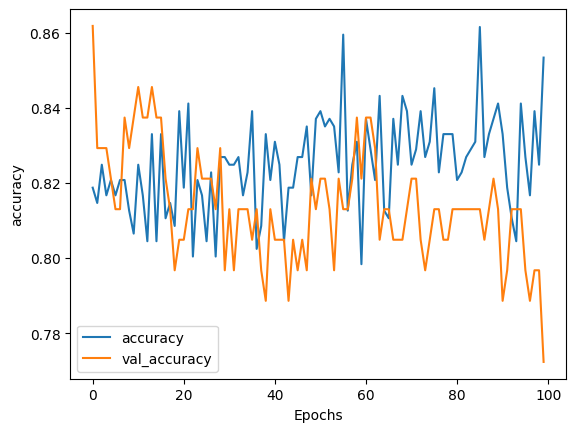

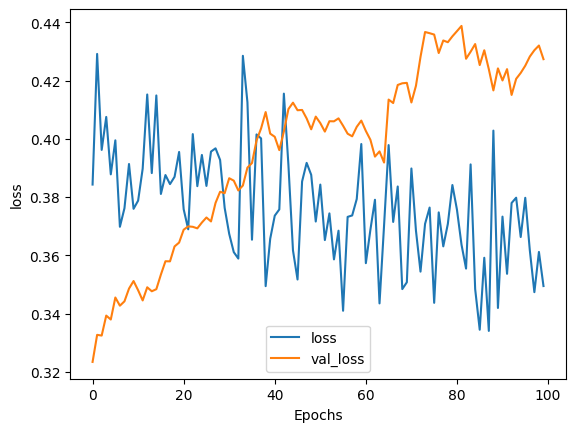

In [32]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [33]:
# Input data untuk prediksi
input_data = (1, 89, 66, 23, 94, 28.1, 0.167, 21)  # Contoh input

# Mengubah input data menjadi numpy array dan reshape untuk prediksi
input_data_as_numpy_array = np.array(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Standarisasi input data menggunakan scaler yang telah dilatih sebelumnya
std_input_data = scaler.transform(input_data_reshaped)

# Prediksi menggunakan model
prediction = model.predict(std_input_data)

# Menggunakan threshold 0.5 untuk klasifikasi biner
prediction_class = (prediction > 0.5)

# Menampilkan hasil prediksi
if prediction_class[0] == 0:
    print("Pasien tidak terkena diabetes")
else:
    print("Pasien terkena diabetes")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Pasien tidak terkena diabetes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [34]:
# Save model into SavedModel format
model.export('neural_network_savedmodel')

Saved artifact at 'neural_network_savedmodel'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 8), dtype=tf.float32, name='keras_tensor_29')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  136282399220736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136282336684768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136282336687760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136282355680352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136282355690384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136282355691264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136282353667936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136282353665824: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [35]:
# Menyimpan model yang telah dilatih
model.save('model.h5')  # Menyimpan model dalam file .h5 untuk digunakan lagi

In [36]:
# Install TensorFlow.js
!pip install tensorflowjs

In [37]:
# Convert model into TensorFlow.js web format.
!tensorflowjs_converter --input_format=tf_saved_model neural_network_savedmodel neural_network_tfjs --skip_op_check

2024-12-07 07:06:08.891895: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733555168.919969   17184 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733555168.928287   17184 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
2024-12-07 07:06:12.932088: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
I0000 00:00:1733555173.042300   17184 devices.cc:67] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
I0000 00:00